## EDA IMF data


### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from numpy import array
import re
from matplotlib.ticker import StrMethodFormatter

C:\Users\u61152\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Build a function to get the data from the IMF website and save it locally

URL = 'http://www.imf.org/external/pubs/ft/weo/2017/02/weodata/WEOOct2020all.xls'
def get_data_from_IMF(URL):
    urllib.request.urlretrieve(URL, '.')

In [4]:
# Reading the dataset
imf = pd.read_excel("data/WEOOct2020all.xlsx", na_values=['--'])

In [5]:
imf.shape

(8777, 56)

In [6]:
# Let's take a look at the first few rows
imf.head(10)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1255.288,1270.216,1319.902,1253.906,1304.063,1363.060,1424.397,1481.497,1540.937,2019.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,2.647,1.189,3.912,-5.000,4.000,4.524,4.500,4.009,4.012,2019.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1285.460,1327.690,1469.596,1465.922,1597.738,1741.832,1893.023,2047.665,2215.013,2019.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.910,18.401,18.876,19.006,19.692,20.829,22.022,23.169,24.372,2019.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,74.712,77.416,81.880,78.884,83.852,89.205,94.908,100.600,106.685,2019.0
5,512,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",The GDP deflator is derived by dividing curren...,Index,NaN,"See notes for: Gross domestic product, consta...",NaN,...,102.404,104.525,111.341,116.908,122.520,127.788,132.900,138.216,143.745,2019.0
6,512,AFG,NGDPRPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant national currency...,National currency,Units,"See notes for: Gross domestic product, consta...",NaN,...,35330.355,34921.941,35472.643,32949.849,33497.402,34225.659,34961.695,35545.663,36140.570,2019.0
7,512,AFG,NGDPRPPPPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",NaN,...,2102.784,2078.476,2111.253,1961.102,1993.691,2037.035,2080.842,2115.599,2151.006,2019.0
8,512,AFG,NGDPPC,Afghanistan,"Gross domestic product per capita, current prices",GDP is expressed in current national currency ...,National currency,Units,"See notes for: Gross domestic product, curren...",NaN,...,36179.576,36502.087,39495.722,38521.149,41041.027,43736.419,46464.066,49129.766,51950.104,2019.0
9,512,AFG,NGDPDPC,Afghanistan,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,...,532.220,505.909,507.290,499.441,505.827,523.013,540.522,555.893,571.606,2019.0


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [7]:
imf["Country"].unique().size

196

In [8]:
imf['Country'].astype('category').value_counts()

Zimbabwe           45
Egypt              45
Hong Kong SAR      45
Honduras           45
Haiti              45
                   ..
Pakistan           45
Oman               45
Norway             45
North Macedonia    45
Afghanistan        45
Name: Country, Length: 195, dtype: int64

In [9]:
imf['WEO Subject Code'].astype('category').value_counts()

TX_RPCH         195
NGDP            195
LUR             195
LP              195
LE              195
GGX_NGDP        195
GGXWDN_NGDP     195
GGXWDN          195
GGXWDG_NGDP     195
GGXWDG          195
GGXONLB_NGDP    195
GGXONLB         195
GGXCNL_NGDP     195
GGXCNL          195
GGX             195
GGSB_NPGDP      195
GGSB            195
GGR_NGDP        195
GGR             195
FLIBOR6         195
BCA_NGDPD       195
NGAP_NPGDP      195
NGDPD           195
TXG_RPCH        195
NGDPDPC         195
TM_RPCH         195
TMG_RPCH        195
PPPSH           195
PPPPC           195
PPPGDP          195
PPPEX           195
PCPIPCH         195
PCPIEPCH        195
PCPIE           195
PCPI            195
NID_NGDP        195
NGSD_NGDP       195
NGDP_RPCH       195
NGDP_R          195
NGDP_FY         195
NGDP_D          195
NGDPRPPPPC      195
NGDPRPC         195
NGDPPC          195
BCA             195
Name: WEO Subject Code, dtype: int64

In [10]:
imf["WEO Subject Code"].unique()

array(['NGDP_R', 'NGDP_RPCH', 'NGDP', 'NGDPD', 'PPPGDP', 'NGDP_D',
       'NGDPRPC', 'NGDPRPPPPC', 'NGDPPC', 'NGDPDPC', 'PPPPC',
       'NGAP_NPGDP', 'PPPSH', 'PPPEX', 'NID_NGDP', 'NGSD_NGDP', 'PCPI',
       'PCPIPCH', 'PCPIE', 'PCPIEPCH', 'FLIBOR6', 'TM_RPCH', 'TMG_RPCH',
       'TX_RPCH', 'TXG_RPCH', 'LUR', 'LE', 'LP', 'GGR', 'GGR_NGDP', 'GGX',
       'GGX_NGDP', 'GGXCNL', 'GGXCNL_NGDP', 'GGSB', 'GGSB_NPGDP',
       'GGXONLB', 'GGXONLB_NGDP', 'GGXWDN', 'GGXWDN_NGDP', 'GGXWDG',
       'GGXWDG_NGDP', 'NGDP_FY', 'BCA', 'BCA_NGDPD', nan], dtype=object)

In [11]:
imf['Subject Descriptor'].astype('category').value_counts()

Gross domestic product, current prices                                                585
Gross domestic product per capita, current prices                                     585
Gross domestic product, constant prices                                               390
General government gross debt                                                         390
General government net debt                                                           390
General government net lending/borrowing                                              390
General government primary net lending/borrowing                                      390
General government revenue                                                            390
General government structural balance                                                 390
General government total expenditure                                                  390
Gross domestic product per capita, constant prices                                    390
Current ac

In [12]:
# Few years data are the OBJECT type, lets convert those into float
#df_obj = imf.select_dtypes(include=[object])
#cols = imf.select_dtypes([np.object]).columns
filteredColumns = imf.dtypes[imf.dtypes == np.object]
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)
#list(df_obj.columns)

['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country', 'Subject Descriptor', 'Subject Notes', 'Units', 'Scale', 'Country/Series-specific Notes']


In [13]:
imf = imf.iloc[:,:-1]
imf["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Democratic Republic of the Congo', 'Republic of Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'The Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Gui

In [14]:
# Lets make a variable with more sensible meaning for indicators

imf["Economic_Indicator"] = imf["WEO Subject Code"].replace({
        'NGDP_RPCH':'GDP_cons_price(%)', 
        'PPPGDP':'GDP_current_prices(USD_Billion)', 
        'NGDPRPPPPCPCH':'GDP_PER_CAP_cons_price(%)', 
        'PCPIPCH':'Inflation_avg_consumer_prices(%)',
        'PCPIEPCH':'Inflation_eop_consumer prices(%)',
        'LUR':'Unemployment_rate(%)',
        'GGXCNL_NGDP': 'lending/borrowing(GDP%)',
        'BCA_NGDPD':'Current_account_balance(GDP%)'
         })
imf["Economic_Indicator"].unique()

array(['NGDP_R', 'GDP_cons_price(%)', 'NGDP', 'NGDPD',
       'GDP_current_prices(USD_Billion)', 'NGDP_D', 'NGDPRPC',
       'NGDPRPPPPC', 'NGDPPC', 'NGDPDPC', 'PPPPC', 'NGAP_NPGDP', 'PPPSH',
       'PPPEX', 'NID_NGDP', 'NGSD_NGDP', 'PCPI',
       'Inflation_avg_consumer_prices(%)', 'PCPIE',
       'Inflation_eop_consumer prices(%)', 'FLIBOR6', 'TM_RPCH',
       'TMG_RPCH', 'TX_RPCH', 'TXG_RPCH', 'Unemployment_rate(%)', 'LE',
       'LP', 'GGR', 'GGR_NGDP', 'GGX', 'GGX_NGDP', 'GGXCNL',
       'lending/borrowing(GDP%)', 'GGSB', 'GGSB_NPGDP', 'GGXONLB',
       'GGXONLB_NGDP', 'GGXWDN', 'GGXWDN_NGDP', 'GGXWDG', 'GGXWDG_NGDP',
       'NGDP_FY', 'BCA', 'Current_account_balance(GDP%)', nan],
      dtype=object)

In [15]:
# check for NAN value
imf.isnull().sum()

WEO Country Code                    1
ISO                                 2
WEO Subject Code                    2
Country                             2
Subject Descriptor                  2
Subject Notes                     197
Units                               2
Scale                            4877
Country/Series-specific Notes    1188
1980                             4969
1981                             4825
1982                             4783
1983                             4736
1984                             4705
1985                             4635
1986                             4592
1987                             4573
1988                             4480
1989                             4418
1990                             3922
1991                             3761
1992                             3386
1993                             3182
1994                             3053
1995                             2691
1996                             2547
1997        

In [16]:
# we can notice some tail comments appended in last of the data file, lets remove
imf.drop(imf.loc[imf['ISO']==0].index, inplace=True)
imf.tail(2)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Economic_Indicator
8775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8776,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# check for missing values
# chek for unquie values
# check for data types

unique_values = imf.nunique()
filtered_empty = imf.isnull().sum(axis=0)
mis_val_percent = imf.isna().mean().round(4) * 100
data_type = imf.dtypes
val_table = pd.concat([unique_values,filtered_empty, mis_val_percent, data_type], axis=1,sort =True)
val_table_columns = val_table.rename(columns = {0: 'Unique', 1 : 'Missing Values', 2 : 'missing %', 3: 'type'})
val_table_columns = val_table_columns.sort_values('missing %', ascending=False)
val_table_columns 

,Unique,Missing Values,missing %,type
1980,3398,4969,56.61,float64
Scale,3,4877,55.57,object
1981,3537,4825,54.97,float64
1982,3606,4783,54.49,float64
1983,3618,4736,53.96,float64
1984,3651,4705,53.61,float64
1985,3737,4635,52.81,float64
1986,3773,4592,52.32,float64
1987,3811,4573,52.10,float64
1988,3891,4480,51.04,float64


In [18]:
# we can see so many nulls in old data & years for few countries, since database is not big lets impute with zero for now
# we might modify or delete this step based on our model performance

#imf = imf.fillna(0)

In [19]:
# Row wise Null
#imf.isnull().all(axis = 1).sum()

In [20]:
# Lets drop few columns on business justification as those are of no use in inference
# "Estimates Start After"
# "Subject Notes"
# "Country/Series-specific Notes"

In [21]:
imf.drop(['Subject Notes','Country/Series-specific Notes'] , axis=1, inplace=True)
imf.head(2)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Units,Scale,1980,1981,1982,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Economic_Indicator
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",National currency,Billions,NaN,NaN,NaN,...,1255.288,1270.216,1319.902,1253.906,1304.063,1363.060,1424.397,1481.497,1540.937,NGDP_R
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,NaN,...,2.647,1.189,3.912,-5.000,4.000,4.524,4.500,4.009,4.012,GDP_cons_price(%)


In [22]:
#imf = imf.select_dtypes(include ='float64') 
#imf.head()

In [23]:
# remove all the catagorical varible to plot
unique_values = imf.nunique()
filtered_empty = imf.isnull().sum(axis=0)
mis_val_percent = imf.isna().mean().round(4) * 100
data_type = imf.dtypes
val_table = pd.concat([unique_values,filtered_empty, mis_val_percent, data_type], axis=1,sort =True)
val_table_columns = val_table.rename(columns = {0: 'Unique', 1 : 'Missing Values', 2 : 'missing %', 3: 'type'})
val_table_columns = val_table_columns.sort_values('missing %', ascending=False)
val_table_columns 

,Unique,Missing Values,missing %,type
1980,3398,4969,56.61,float64
Scale,3,4877,55.57,object
1981,3537,4825,54.97,float64
1982,3606,4783,54.49,float64
1983,3618,4736,53.96,float64
1984,3651,4705,53.61,float64
1985,3737,4635,52.81,float64
1986,3773,4592,52.32,float64
1987,3811,4573,52.10,float64
1988,3891,4480,51.04,float64


In [24]:
imf["WEO Subject Code"].unique()

array(['NGDP_R', 'NGDP_RPCH', 'NGDP', 'NGDPD', 'PPPGDP', 'NGDP_D',
       'NGDPRPC', 'NGDPRPPPPC', 'NGDPPC', 'NGDPDPC', 'PPPPC',
       'NGAP_NPGDP', 'PPPSH', 'PPPEX', 'NID_NGDP', 'NGSD_NGDP', 'PCPI',
       'PCPIPCH', 'PCPIE', 'PCPIEPCH', 'FLIBOR6', 'TM_RPCH', 'TMG_RPCH',
       'TX_RPCH', 'TXG_RPCH', 'LUR', 'LE', 'LP', 'GGR', 'GGR_NGDP', 'GGX',
       'GGX_NGDP', 'GGXCNL', 'GGXCNL_NGDP', 'GGSB', 'GGSB_NPGDP',
       'GGXONLB', 'GGXONLB_NGDP', 'GGXWDN', 'GGXWDN_NGDP', 'GGXWDG',
       'GGXWDG_NGDP', 'NGDP_FY', 'BCA', 'BCA_NGDPD', nan], dtype=object)

In [25]:
#so there is no use of subject code, we will use descriptor, lets remove code
#imf.drop(['WEO Subject Code'] , axis=1, inplace=True)
#there is no use of year 2021,since we have to predict it, lets remove
imf.drop([2021] , axis=1, inplace=True)

In [26]:
imf.head(2)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Units,Scale,1980,1981,1982,...,2016,2017,2018,2019,2020,2022,2023,2024,2025,Economic_Indicator
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",National currency,Billions,NaN,NaN,NaN,...,1222.917,1255.288,1270.216,1319.902,1253.906,1363.060,1424.397,1481.497,1540.937,NGDP_R
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,NaN,...,2.164,2.647,1.189,3.912,-5.000,4.524,4.500,4.009,4.012,GDP_cons_price(%)


In [27]:
# Now we will try to take each indicator one by one, lets rename subject descriptor to economy indicators
imf["Subject Descriptor"].unique()
#imf.rename(columns = {'Subject Descriptor':'Economic Indicator'}, inplace = True) 

array(['Gross domestic product, constant prices',
       'Gross domestic product, current prices',
       'Gross domestic product, deflator',
       'Gross domestic product per capita, constant prices',
       'Gross domestic product per capita, current prices',
       'Output gap in percent of potential GDP',
       'Gross domestic product based on purchasing-power-parity (PPP) share of world total',
       'Implied PPP conversion rate', 'Total investment',
       'Gross national savings', 'Inflation, average consumer prices',
       'Inflation, end of period consumer prices',
       'Six-month London interbank offered rate (LIBOR)',
       'Volume of imports of goods and services',
       'Volume of Imports of goods',
       'Volume of exports of goods and services',
       'Volume of exports of goods', 'Unemployment rate', 'Employment',
       'Population', 'General government revenue',
       'General government total expenditure',
       'General government net lending/borrowing',

In [28]:
imf.head(2)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Units,Scale,1980,1981,1982,...,2016,2017,2018,2019,2020,2022,2023,2024,2025,Economic_Indicator
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",National currency,Billions,NaN,NaN,NaN,...,1222.917,1255.288,1270.216,1319.902,1253.906,1363.060,1424.397,1481.497,1540.937,NGDP_R
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,NaN,...,2.164,2.647,1.189,3.912,-5.000,4.524,4.500,4.009,4.012,GDP_cons_price(%)


In [29]:
imf = imf.drop(columns=['ISO','WEO Country Code','Units'])
imf.head()

,WEO Subject Code,Country,Subject Descriptor,Scale,1980,1981,1982,1983,1984,1985,...,2016,2017,2018,2019,2020,2022,2023,2024,2025,Economic_Indicator
0,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Billions,NaN,NaN,NaN,NaN,NaN,NaN,...,1222.917,1255.288,1270.216,1319.902,1253.906,1363.060,1424.397,1481.497,1540.937,NGDP_R
1,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.164,2.647,1.189,3.912,-5.000,4.524,4.500,4.009,4.012,GDP_cons_price(%)
2,NGDP,Afghanistan,"Gross domestic product, current prices",Billions,NaN,NaN,NaN,NaN,NaN,NaN,...,1222.917,1285.460,1327.690,1469.596,1465.922,1741.832,1893.023,2047.665,2215.013,NGDP
3,NGDPD,Afghanistan,"Gross domestic product, current prices",Billions,NaN,NaN,NaN,NaN,NaN,NaN,...,17.994,18.910,18.401,18.876,19.006,20.829,22.022,23.169,24.372,NGDPD
4,PPPGDP,Afghanistan,"Gross domestic product, current prices",Billions,NaN,NaN,NaN,NaN,NaN,NaN,...,70.098,74.712,77.416,81.880,78.884,89.205,94.908,100.600,106.685,GDP_current_prices(USD_Billion)


In [30]:
data = imf.drop(columns=['Subject Descriptor','WEO Subject Code'])
data.head()

,Country,Scale,1980,1981,1982,1983,1984,1985,1986,1987,...,2016,2017,2018,2019,2020,2022,2023,2024,2025,Economic_Indicator
0,Afghanistan,Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1222.917,1255.288,1270.216,1319.902,1253.906,1363.060,1424.397,1481.497,1540.937,NGDP_R
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.164,2.647,1.189,3.912,-5.000,4.524,4.500,4.009,4.012,GDP_cons_price(%)
2,Afghanistan,Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1222.917,1285.460,1327.690,1469.596,1465.922,1741.832,1893.023,2047.665,2215.013,NGDP
3,Afghanistan,Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.994,18.910,18.401,18.876,19.006,20.829,22.022,23.169,24.372,NGDPD
4,Afghanistan,Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.098,74.712,77.416,81.880,78.884,89.205,94.908,100.600,106.685,GDP_current_prices(USD_Billion)


In [31]:
# Dropping scale column as it has too many NAN, And not have any business impact
imf = imf.drop(columns=['Scale', 'Subject Descriptor', 'WEO Subject Code'])
#'WEO Country Code' 'Subject Notes' 'Units'\n 'Country/Series-specific Notes
imf.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2016,2017,2018,2019,2020,2022,2023,2024,2025,Economic_Indicator
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1222.917,1255.288,1270.216,1319.902,1253.906,1363.060,1424.397,1481.497,1540.937,NGDP_R
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.164,2.647,1.189,3.912,-5.000,4.524,4.500,4.009,4.012,GDP_cons_price(%)
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1222.917,1285.460,1327.690,1469.596,1465.922,1741.832,1893.023,2047.665,2215.013,NGDP
3,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.994,18.910,18.401,18.876,19.006,20.829,22.022,23.169,24.372,NGDPD
4,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.098,74.712,77.416,81.880,78.884,89.205,94.908,100.600,106.685,GDP_current_prices(USD_Billion)


In [32]:
# This is just for visulisation visualization
# create a pivot with the columns with years
data1 = imf.iloc[:,1:-1]
data2 = pd.concat((imf["Country"],imf["Economic_Indicator"]), axis=1)
imf_pivot = pd.concat((data2, data1), axis=1)
imf_pivot = imf_pivot.set_index(['Country','Economic_Indicator'])
imf_pivot = imf_pivot.stack()
imf = imf_pivot.unstack(1).reset_index()
imf.rename(columns={"level_1": "Year"}, inplace=True)
imf.head(20)

Economic_Indicator,Country,Year,BCA,Current_account_balance(GDP%),FLIBOR6,GDP_cons_price(%),GDP_current_prices(USD_Billion),GGR,GGR_NGDP,GGSB,...,PCPIE,PPPEX,PPPPC,PPPSH,TMG_RPCH,TM_RPCH,TXG_RPCH,TX_RPCH,Unemployment_rate(%),lending/borrowing(GDP%)
0,Afghanistan,2002,1.481,33.908,NaN,NaN,19.677,12.235,6.845,NaN,...,42.890,9.085,886.227,0.036,NaN,NaN,NaN,NaN,NaN,-0.098
1,Afghanistan,2003,1.348,29.616,NaN,8.692,21.784,21.618,9.826,NaN,...,45.691,10.100,942.382,0.037,35.018,37.300,87.548,49.262,NaN,-2.102
2,Afghanistan,2004,1.915,37.216,NaN,0.671,22.521,31.209,12.676,NaN,...,51.752,10.933,937.636,0.036,-0.960,1.403,-27.364,-5.861,NaN,-2.393
3,Afghanistan,2005,1.864,30.226,NaN,11.830,25.969,44.926,14.733,NaN,...,57.219,11.742,1044.589,0.038,51.689,55.435,17.543,46.497,NaN,-0.965
4,Afghanistan,2006,1.444,20.844,NaN,5.361,28.190,65.518,18.946,NaN,...,59.671,12.268,1099.814,0.038,-1.056,-2.324,-33.218,-7.933,NaN,0.643
5,Afghanistan,2007,5.424,63.390,NaN,13.340,32.808,81.163,18.986,NaN,...,69.273,13.030,1232.621,0.041,-15.195,-9.869,39.065,-10.109,NaN,-2.492
6,Afghanistan,2008,3.477,33.769,NaN,3.863,34.739,88.162,17.036,NaN,...,82.306,14.897,1272.751,0.041,-2.958,-7.882,50.728,-6.911,NaN,-3.882
7,Afghanistan,2009,5.018,41.587,NaN,20.585,42.209,117.745,19.391,NaN,...,74.211,14.386,1507.225,0.050,25.444,28.046,-20.600,31.230,NaN,-1.779
8,Afghanistan,2010,4.510,29.430,NaN,8.438,46.304,154.612,21.722,NaN,...,81.814,15.371,1607.598,0.052,33.425,32.285,-2.964,9.768,NaN,0.922
9,Afghanistan,2011,4.754,26.574,NaN,6.479,50.334,177.821,21.265,NaN,...,89.433,16.613,1694.256,0.053,8.001,12.751,-10.267,1.786,NaN,-0.672


##### Interpolation of missing values 

In [33]:
imf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8083 entries, 0 to 8082
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           8083 non-null   object 
 1   Year                              8083 non-null   int64  
 2   BCA                               7637 non-null   float64
 3   Current_account_balance(GDP%)     7624 non-null   float64
 4   FLIBOR6                           82 non-null     float64
 5   GDP_cons_price(%)                 7934 non-null   float64
 6   GDP_current_prices(USD_Billion)   8010 non-null   float64
 7   GGR                               6458 non-null   float64
 8   GGR_NGDP                          6446 non-null   float64
 9   GGSB                              2570 non-null   float64
 10  GGSB_NPGDP                        2405 non-null   float64
 11  GGX                               6404 non-null   float64
 12  GGXCNL

In [34]:
imf.interpolate(method ='linear', limit_direction ='backward', limit = None) 

Economic_Indicator,Country,Year,BCA,Current_account_balance(GDP%),FLIBOR6,GDP_cons_price(%),GDP_current_prices(USD_Billion),GGR,GGR_NGDP,GGSB,...,PCPIE,PPPEX,PPPPC,PPPSH,TMG_RPCH,TM_RPCH,TXG_RPCH,TX_RPCH,Unemployment_rate(%),lending/borrowing(GDP%)
0,Afghanistan,2002,1.481,33.908,10.861,8.692,19.677,12.235,6.845,69.49,...,42.890,9.085,886.227,0.036,35.018,37.300,87.548,49.262,5.028,-0.098
1,Afghanistan,2003,1.348,29.616,10.861,8.692,21.784,21.618,9.826,69.49,...,45.691,10.100,942.382,0.037,35.018,37.300,87.548,49.262,5.028,-2.102
2,Afghanistan,2004,1.915,37.216,10.861,0.671,22.521,31.209,12.676,69.49,...,51.752,10.933,937.636,0.036,-0.960,1.403,-27.364,-5.861,5.028,-2.393
3,Afghanistan,2005,1.864,30.226,10.861,11.830,25.969,44.926,14.733,69.49,...,57.219,11.742,1044.589,0.038,51.689,55.435,17.543,46.497,5.028,-0.965
4,Afghanistan,2006,1.444,20.844,10.861,5.361,28.190,65.518,18.946,69.49,...,59.671,12.268,1099.814,0.038,-1.056,-2.324,-33.218,-7.933,5.028,0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8078,Zimbabwe,2020,-0.505,-3.606,NaN,-10.378,39.234,111.549,14.207,NaN,...,3179.961,20.012,2583.008,0.030,27.815,NaN,6.651,NaN,NaN,-1.848
8079,Zimbabwe,2022,-0.288,-3.416,NaN,2.485,43.568,139.969,14.771,NaN,...,3373.620,21.749,2754.510,0.029,30.919,NaN,7.548,NaN,NaN,0.138
8080,Zimbabwe,2023,-0.589,-6.735,NaN,2.160,45.315,147.581,14.771,NaN,...,3474.829,22.048,2803.416,0.029,32.170,NaN,5.947,NaN,NaN,0.218
8081,Zimbabwe,2024,-0.603,-6.534,NaN,2.160,47.179,148.884,13.918,NaN,...,3579.074,22.674,2862.697,0.029,33.808,NaN,5.831,NaN,NaN,-0.113


In [35]:
imf = imf.fillna(0)

In [36]:
# Save the clean data for future & modeling
imf.to_excel("data/WEOOct2020all_clean.xls")

In [37]:
#Lets convert year to numeric for ploting
imf["Year"] = pd.to_numeric(imf["Year"])

In [38]:
imf.nlargest(195,['GDP_current_prices(USD_Billion)']).drop_duplicates('Country')

Economic_Indicator,Country,Year,BCA,Current_account_balance(GDP%),FLIBOR6,GDP_cons_price(%),GDP_current_prices(USD_Billion),GGR,GGR_NGDP,GGSB,...,PCPIE,PPPEX,PPPPC,PPPSH,TMG_RPCH,TM_RPCH,TXG_RPCH,TX_RPCH,Unemployment_rate(%),lending/borrowing(GDP%)
1483,China,2025,121.500,0.526,0.0,5.494,35882.250,38329.759,24.971,-12486.926,...,1.282890e+02,4.278,25306.580,20.571,4.023,4.110,3.829,3.900,3.510,-8.135
7714,United States,2025,-518.519,-2.011,0.0,1.831,25783.444,7840.214,30.408,-1381.492,...,2.936190e+02,1.000,76474.998,14.781,2.153,2.238,2.266,2.357,4.431,-5.497
3166,India,2025,-98.960,-2.500,0.0,7.182,13909.252,65839.094,19.889,-30147.779,...,1.870150e+02,23.800,9589.167,7.974,9.000,9.000,7.500,7.742,0.000,-9.105
3508,Japan,2025,186.994,3.109,0.0,0.563,6160.480,199492.932,34.783,-15696.223,...,1.058190e+02,93.098,50071.120,3.532,2.158,2.158,2.727,2.727,2.333,-2.739
2581,Germany,2025,336.044,6.666,0.0,1.198,5494.219,1881.848,46.717,42.038,...,1.154110e+02,0.733,66365.721,3.150,3.536,3.536,3.255,3.255,3.363,1.046
5898,Russia,2025,34.356,1.814,0.0,1.795,4941.805,47493.480,33.373,-777.387,...,1.451710e+02,28.797,33846.812,2.833,2.385,2.244,1.179,1.371,4.600,-0.546
3211,Indonesia,2025,-28.029,-1.828,0.0,5.073,4752.998,3123985.462,13.287,-569504.019,...,1.211630e+02,4946.693,16827.481,2.725,7.952,7.952,9.888,9.888,5.300,-2.506
949,Brazil,2025,-13.613,-0.720,0.0,2.218,3805.938,2902.461,30.249,-564.208,...,4.181228e+13,2.521,17486.087,2.182,3.670,4.862,3.600,3.793,10.820,-5.897
7669,United Kingdom,2025,-111.847,-3.332,0.0,1.633,3773.231,981.050,38.214,-111.940,...,1.191260e+02,0.680,54779.896,2.163,2.585,1.949,3.231,2.123,4.200,-4.447
2457,France,2025,-28.917,-0.848,0.0,1.678,3758.774,1391.809,51.051,-128.231,...,1.124060e+02,0.725,57034.923,2.155,2.645,2.645,3.865,3.865,8.466,-4.704


In [39]:
imf_2020 = imf.loc[imf['Year'] == 2020]
imf_2020.head()

Economic_Indicator,Country,Year,BCA,Current_account_balance(GDP%),FLIBOR6,GDP_cons_price(%),GDP_current_prices(USD_Billion),GGR,GGR_NGDP,GGSB,...,PCPIE,PPPEX,PPPPC,PPPSH,TMG_RPCH,TM_RPCH,TXG_RPCH,TX_RPCH,Unemployment_rate(%),lending/borrowing(GDP%)
18,Afghanistan,2020,1.802,9.481,0.0,-5.000,78.884,437.848,29.868,0.0,...,122.115,18.583,2072.894,0.061,6.448,4.926,-27.053,-33.428,0.000,-2.793
63,Albania,2020,-1.642,-11.697,0.0,-7.529,39.113,384.224,24.471,0.0,...,108.334,40.144,13651.341,0.030,-25.270,-21.846,-5.733,-35.342,11.800,-8.422
108,Algeria,2020,-15.917,-10.804,0.0,-5.461,488.291,5143.064,28.152,0.0,...,218.711,37.414,11040.555,0.375,-2.681,-2.681,-2.500,2.027,14.103,-11.487
153,Angola,2020,-0.817,-1.303,0.0,-4.011,216.550,6366.629,17.925,-548.1,...,465.972,164.018,6978.425,0.166,-24.436,-23.763,0.638,1.212,0.000,-2.808
198,Antigua and Barbuda,2020,-0.306,-22.035,0.0,-17.273,1.830,0.670,17.867,0.0,...,102.364,2.049,18655.044,0.001,-29.627,-39.681,-34.902,-58.966,0.000,-12.187


In [40]:
imf_2020_indicators = imf_2020.sort_values(['GDP_current_prices(USD_Billion)'], ascending=False).drop_duplicates('Country').head(20)
#imf_2020_indicators.drop(['Economic_Indicator'] , axis=1, inplace=True)
#imf_2020_indicators

In [41]:
#imf.nlargest(195,['GDP_current_prices(USD_Billion)']).drop_duplicates('Country')

In [42]:
imf_2020_gdp = imf_2020_indicators[['Country', 'GDP_current_prices(USD_Billion)']]
imf_2020_gdp.head(22)

Economic_Indicator,Country,GDP_current_prices(USD_Billion)
1479,China,24162.435
7710,United States,20807.269
3162,India,8681.303
3504,Japan,5236.138
2577,Germany,4454.498
5894,Russia,4021.733
3207,Indonesia,3328.288
945,Brazil,3078.901
7665,United Kingdom,2978.564
2453,France,2954.196


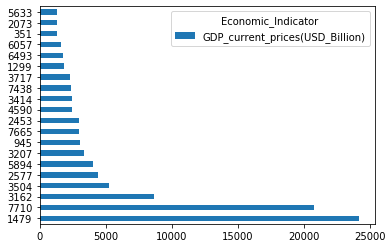

In [43]:
imf_2020_gdp.plot(kind='barh')
#ax = imf_2020.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [44]:
def plottop20_indicators(subset, indicator):
    ax = subset.set_index('Country').plot(kind='barh', figsize=(10, 12), color='#9ca99f', zorder=2, width=0.85)

    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Switch off ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    ax.set_xlabel(indicator, labelpad=20, weight='bold', size=12)

    # Set y-axis label
    ax.set_ylabel("TOP 20 countries", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    ax.invert_yaxis()

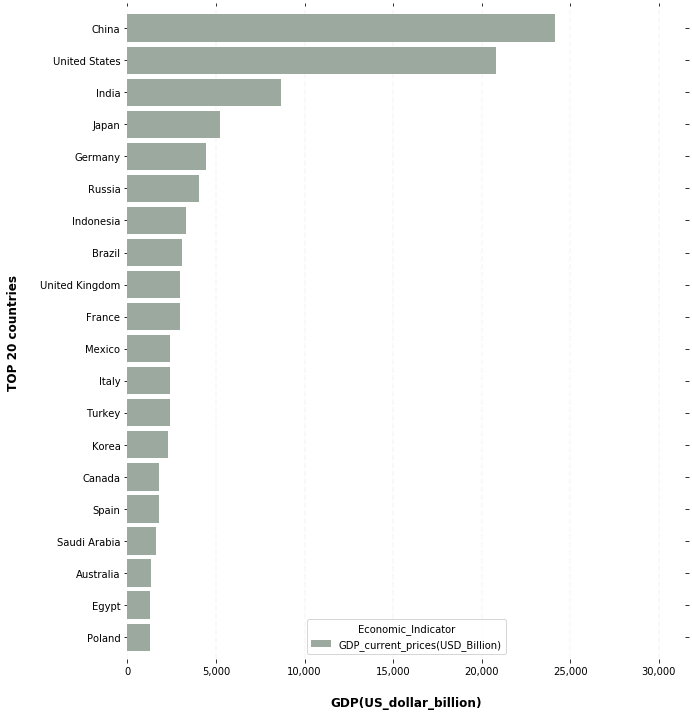

In [45]:
plottop20_indicators(imf_2020_gdp,"GDP(US_dollar_billion)")

In [46]:
imf_2020_avg_con_price = imf_2020_indicators[['Country', 'Inflation_avg_consumer_prices(%)']]

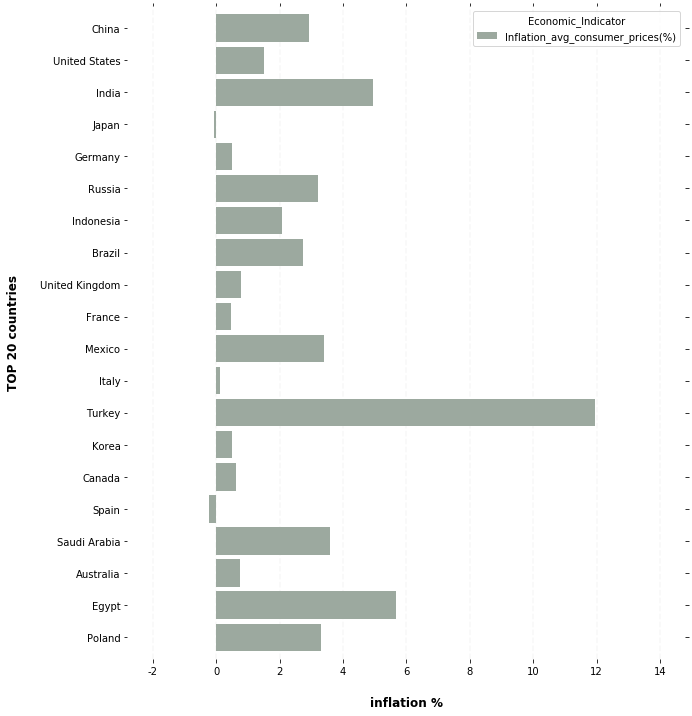

In [47]:
plottop20_indicators(imf_2020_avg_con_price,"inflation %")

In [48]:
imf_2020_unemployment = imf_2020_indicators[['Country', 'Unemployment_rate(%)']]

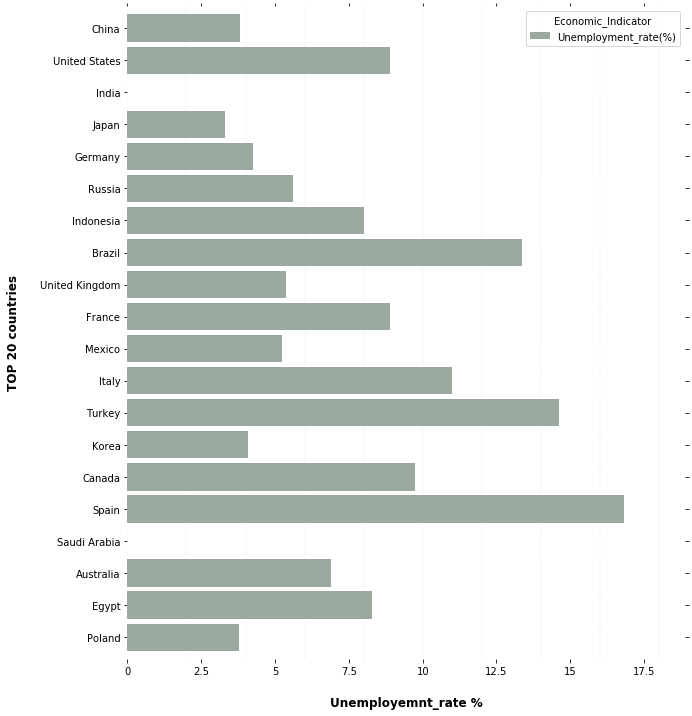

In [49]:
plottop20_indicators(imf_2020_unemployment,"Unemployemnt_rate %")

In [50]:
imf

Economic_Indicator,Country,Year,BCA,Current_account_balance(GDP%),FLIBOR6,GDP_cons_price(%),GDP_current_prices(USD_Billion),GGR,GGR_NGDP,GGSB,...,PCPIE,PPPEX,PPPPC,PPPSH,TMG_RPCH,TM_RPCH,TXG_RPCH,TX_RPCH,Unemployment_rate(%),lending/borrowing(GDP%)
0,Afghanistan,2002,1.481,33.908,0.0,0.000,19.677,12.235,6.845,0.0,...,42.890,9.085,886.227,0.036,0.000,0.000,0.000,0.000,0.0,-0.098
1,Afghanistan,2003,1.348,29.616,0.0,8.692,21.784,21.618,9.826,0.0,...,45.691,10.100,942.382,0.037,35.018,37.300,87.548,49.262,0.0,-2.102
2,Afghanistan,2004,1.915,37.216,0.0,0.671,22.521,31.209,12.676,0.0,...,51.752,10.933,937.636,0.036,-0.960,1.403,-27.364,-5.861,0.0,-2.393
3,Afghanistan,2005,1.864,30.226,0.0,11.830,25.969,44.926,14.733,0.0,...,57.219,11.742,1044.589,0.038,51.689,55.435,17.543,46.497,0.0,-0.965
4,Afghanistan,2006,1.444,20.844,0.0,5.361,28.190,65.518,18.946,0.0,...,59.671,12.268,1099.814,0.038,-1.056,-2.324,-33.218,-7.933,0.0,0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8078,Zimbabwe,2020,-0.505,-3.606,0.0,-10.378,39.234,111.549,14.207,0.0,...,3179.961,20.012,2583.008,0.030,27.815,0.000,6.651,0.000,0.0,-1.848
8079,Zimbabwe,2022,-0.288,-3.416,0.0,2.485,43.568,139.969,14.771,0.0,...,3373.620,21.749,2754.510,0.029,30.919,0.000,7.548,0.000,0.0,0.138
8080,Zimbabwe,2023,-0.589,-6.735,0.0,2.160,45.315,147.581,14.771,0.0,...,3474.829,22.048,2803.416,0.029,32.170,0.000,5.947,0.000,0.0,0.218
8081,Zimbabwe,2024,-0.603,-6.534,0.0,2.160,47.179,148.884,13.918,0.0,...,3579.074,22.674,2862.697,0.029,33.808,0.000,5.831,0.000,0.0,-0.113


In [51]:
def linechart(country,variable,init=1980,final=2020):
    plt.plot(imf["Year"][(imf["Year"]>=init) & 
                           (imf["Year"]<=final)].unique(), 
                           imf[variable][(imf['Country']==country) & 
                           (imf["Year"]>=init) & (imf["Year"]<=final)])
    plt.show()

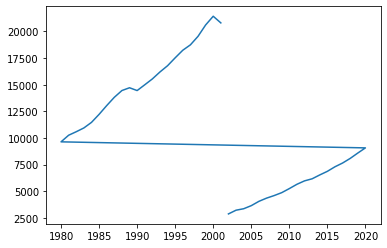

In [52]:
linechart('United States', 'GDP_current_prices(USD_Billion)')

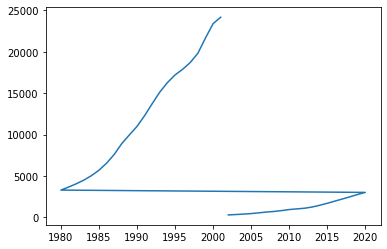

In [53]:
linechart('China', 'GDP_current_prices(USD_Billion)')

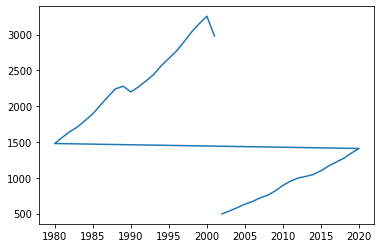

In [54]:
linechart('United Kingdom', 'GDP_current_prices(USD_Billion)')